In [29]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from colicoords import Data, CellListPlot, IterCellPlot, AutoIterCellPlot, save, load, CellPlot
import os
import mahotas as mh

In [30]:
import colicoords
colicoords.__file__

'C:\\Users\\jhs\\Programming\\cc_master\\colicoords\\__init__.py'

In [31]:
#c41_raw = load('c41_cell_raw.hdf5')
escc_raw = load('escC_cell_raw.hdf5')
#epec_raw = load('epec_cell_raw.hdf5')

In [4]:
c41_binary = c41_raw.copy()
res_c41 = c41_binary.optimize_mp()

In [32]:
escC_binary = escc_raw.copy()
res_escC = escC_binary.optimize_mp()

In [6]:
epec_binary = epec_raw.copy()
res_epec = epec_binary.optimize_mp()

In [7]:
np.where(np.equal(res_c41, None))

(array([308], dtype=int64),)

In [33]:
np.where(np.equal(res_escC, None))

(array([  95, 2586, 3674], dtype=int64),)

In [8]:
np.where(np.equal(res_epec, None))

(array([], dtype=int64),)

In [10]:
bn = ~np.equal(res_c41, None)

In [11]:
obj_c41 = np.array([r.objective_value for r in np.array(res_c41)[bn]])
a_c41 = np.array([c.data.binary_img.sum() for c in c41_binary[bn]])
f =  obj_c41 / a_c41

<IPython.core.display.Javascript object>


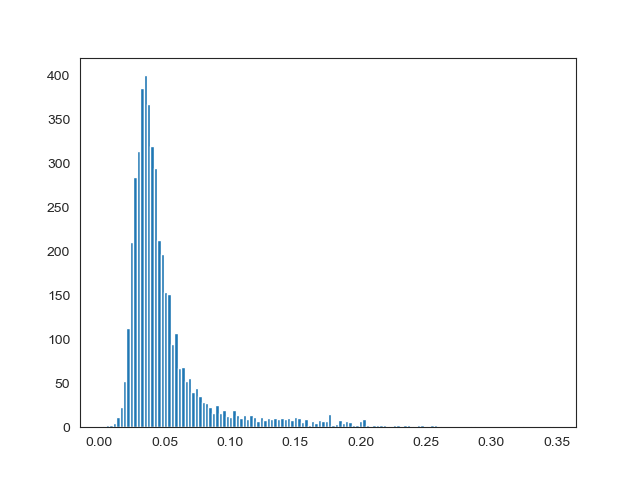

In [12]:
plt.figure()
h = plt.hist(f, bins='fd')

<IPython.core.display.Javascript object>


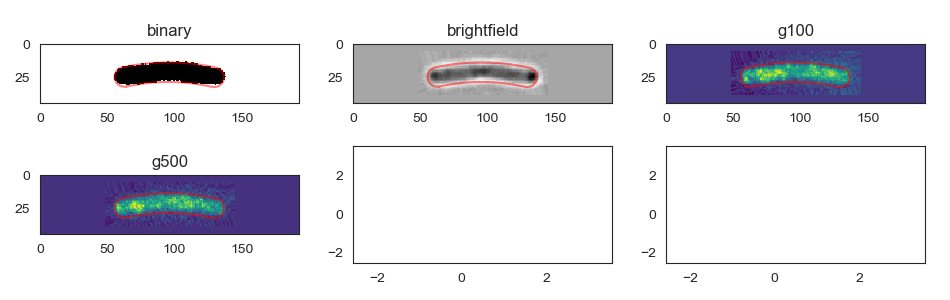

In [13]:
b = f < 0.1
aicp = AutoIterCellPlot(c41_binary[bn][b])
aicp.plot()

In [14]:
c41_selected = c41_binary[bn][b]

In [15]:
save('c41_binary_opt.hdf5', c41_selected)

In [34]:
bn = ~np.equal(res_escC, None)

In [35]:
obj_escC = np.array([r.objective_value for r in np.array(res_escC)[bn]])
a_escC = np.array([c.data.binary_img.sum() for c in escC_binary[bn]])
f =  obj_escC / a_escC

<IPython.core.display.Javascript object>


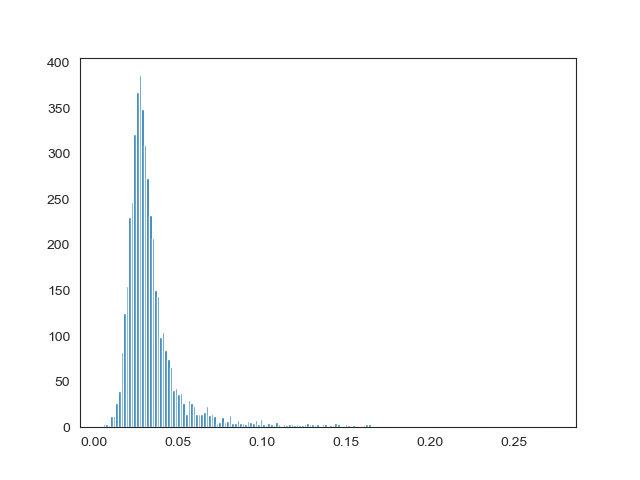

In [36]:
plt.figure()
h = plt.hist(f, bins='fd')

<IPython.core.display.Javascript object>


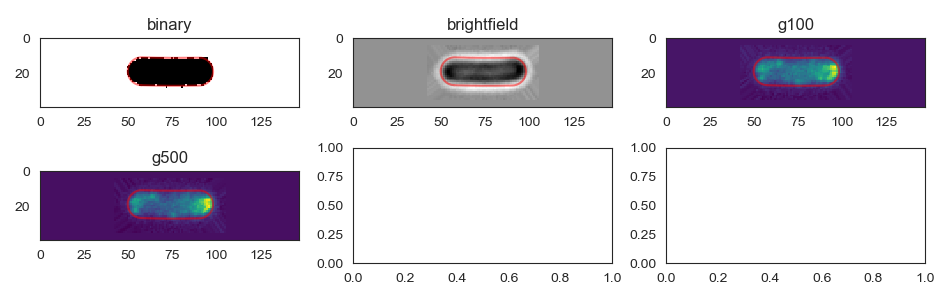

In [37]:
b = f < 0.06
aicp = AutoIterCellPlot(escC_binary[bn][b])
aicp.plot()

In [38]:
escC_selected = escC_binary[bn][b]

In [39]:
save('escC_binary_opt.hdf5', escC_selected)

In [23]:
bn = ~np.equal(res_epec, None)

In [24]:
obj_epec = np.array([r.objective_value for r in np.array(res_epec)[bn]])
a_epec = np.array([c.data.binary_img.sum() for c in epec_binary[bn]])
f =  obj_epec / a_epec

<IPython.core.display.Javascript object>


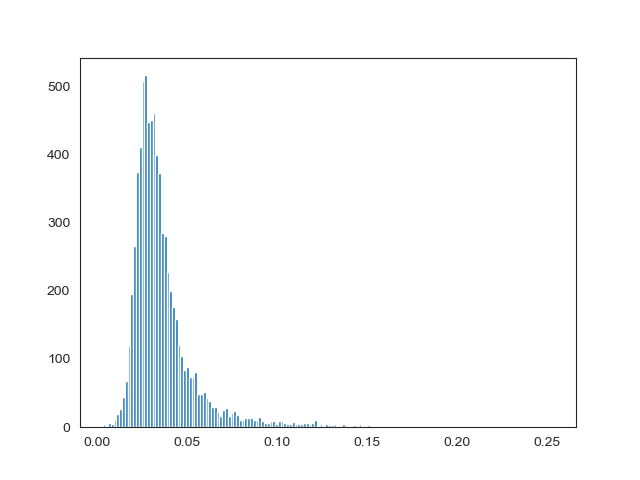

In [25]:
plt.figure()
h = plt.hist(f, bins='fd')

<IPython.core.display.Javascript object>


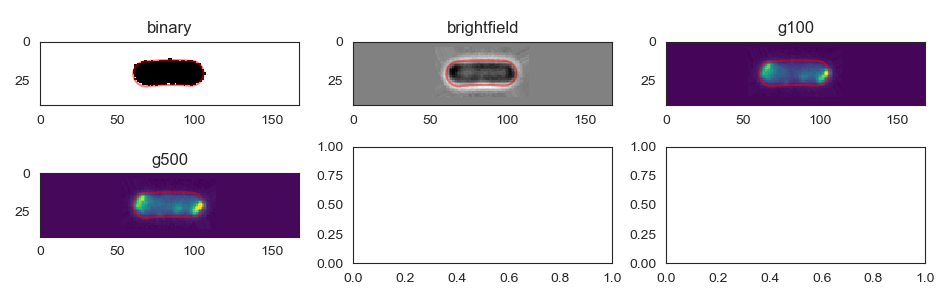

In [26]:
b = f < 0.07
aicp = AutoIterCellPlot(epec_binary[b])
aicp.plot()

In [27]:
epec_selected = epec_binary[b]
len(epec_selected)

6994

In [28]:
save('epec_binary_opt.hdf5', epec_selected)